Modelo de Score de Crédito

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

Carregar e Explorar os Dados

In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url, delimiter=' ', header=None)


df.columns = [
    'status_conta', 'duracao_meses', 'historico_credito', 'finalidade', 'valor_credito',
    'poupanca', 'emprego_atual', 'taxa_pagamento', 'estado_civil', 'garantia',
    'residencia_atual', 'propriedades', 'idade', 'outros_planos', 'moradia',
    'creditos_existentes', 'trabalho', 'dependentes', 'telefone', 'estrangeiro', 'risk'
]


df.head()

,status_conta,duracao_meses,historico_credito,finalidade,valor_credito,poupanca,emprego_atual,taxa_pagamento,estado_civil,garantia,...,propriedades,idade,outros_planos,moradia,creditos_existentes,trabalho,dependentes,telefone,estrangeiro,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Análise Exploratória

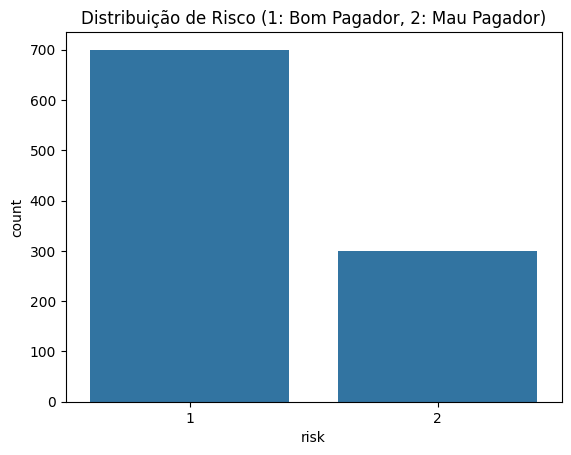

,duracao_meses,valor_credito,taxa_pagamento,residencia_atual,idade,creditos_existentes,dependentes,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:

sns.countplot(x='risk', data=df)
plt.title("Distribuição de Risco (1: Bom Pagador, 2: Mau Pagador)")
plt.show()


df.describe()

Pré-processamento dos Dados

In [ ]:

df = pd.get_dummies(df, drop_first=True)


X = df.drop('risk', axis=1)
y = df['risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Treinamento do Modelo

In [ ]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para cálculo do score

Avaliação do Modelo

In [ ]:

print(classification_report(y_test, y_pred))


print("AUC-ROC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           1       0.76      0.94      0.84       209
           2       0.69      0.32      0.44        91

    accuracy                           0.75       300
   macro avg       0.73      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300

AUC-ROC: 0.7758294337241706


Criação do Scorecard

In [ ]:

scores = (y_proba * 850).astype(int)  # Escala de 0 a 850


def classificar_risco(score):
    if score < 300:
        return "Alto Risco"
    elif score < 600:
        return "Médio Risco"
    else:
        return "Baixo Risco"

df_scores = pd.DataFrame({'score': scores, 'risco': [classificar_risco(s) for s in scores]})
df_scores.head()

,score,risco
0,272,Alto Risco
1,340,Médio Risco
2,518,Médio Risco
3,365,Médio Risco
4,76,Alto Risco


Dashboard

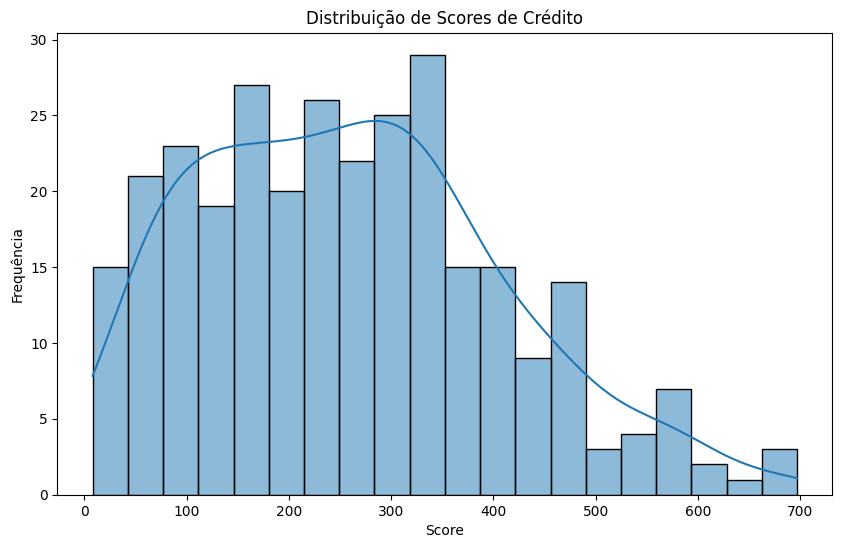

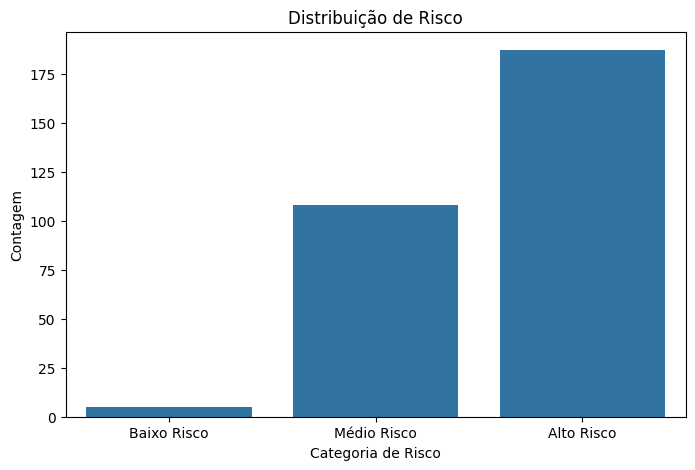

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df_scores['score'], bins=20, kde=True)
plt.title("Distribuição de Scores de Crédito")
plt.xlabel("Score")
plt.ylabel("Frequência")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='risco', data=df_scores, order=["Baixo Risco", "Médio Risco", "Alto Risco"])
plt.title("Distribuição de Risco")
plt.xlabel("Categoria de Risco")
plt.ylabel("Contagem")
plt.show()

Exportar Resultados

In [ ]:

df_scores.to_csv("scores_clientes.csv", index=False)


import joblib
joblib.dump(model, "modelo_score_credito.pkl")

['modelo_score_credito.pkl']

Testando Outros Algoritmos e Ajustando Hiperparâmetros

Regressão Logística


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

print("Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_log_reg))

Regressão Logística:
              precision    recall  f1-score   support

           1       0.80      0.90      0.85       209
           2       0.68      0.48      0.56        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.76      0.77      0.76       300

AUC-ROC: 0.8173931331826069


Ajuste de Hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'penalty': ['l1', 'l2'],        # Tipo de regularização
    'solver': ['liblinear']         # Algoritmo de otimização
}


grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


print("Melhores parâmetros:", grid_search.best_params_)


y_pred_log_reg_tuned = grid_search.predict(X_test)
y_proba_log_reg_tuned = grid_search.predict_proba(X_test)[:, 1]

print("Regressão Logística Ajustada:")
print(classification_report(y_test, y_pred_log_reg_tuned))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_log_reg_tuned))

Melhores parâmetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Regressão Logística Ajustada:
              precision    recall  f1-score   support

           1       0.80      0.88      0.83       209
           2       0.63      0.48      0.55        91

    accuracy                           0.76       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.74      0.76      0.75       300

AUC-ROC: 0.8009884851990114


XGBoost

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

O erro ocorre porque o XGBoost espera que as classes da variável alvo (y) sejam 0 e 1, mas no seu dataset as classes estão definidas como 1 e 2. Isso é comum em alguns datasets, como o German Credit Dataset, onde a variável alvo é codificada como 1 (bom pagador) e 2 (mau pagador).

Para resolver esse problema, você precisa mapear as classes para 0 e 1 antes de treinar o modelo. Vou te mostrar como fazer isso:

Mapear as Classes para 0 e 1

In [ ]:
import numpy as np

print("Valores únicos de y:", np.unique(y))

Valores únicos de y: [1 2]


Mapear as Classes para 0 e 1

In [ ]:

y = np.where(y == 1, 0, 1)


print("Novos valores únicos de y:", np.unique(y))

Novos valores únicos de y: [0 1]


Treinar o Modelo com as Classes Corrigidas

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

Corrigindo

In [ ]:
import numpy as np

print("Valores únicos de y antes do mapeamento:", np.unique(y))

Valores únicos de y antes do mapeamento: [0 1]


In [ ]:

y = np.where(y == 1, 0, 1)


print("Valores únicos de y após o mapeamento:", np.unique(y))

Valores únicos de y após o mapeamento: [0 1]


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Valores únicos de y_train:", np.unique(y_train))
print("Valores únicos de y_test:", np.unique(y_test))

Valores únicos de y_train: [0 1]
Valores únicos de y_test: [0 1]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost:
              precision    recall  f1-score   support

           0       0.64      0.46      0.54        91
           1       0.79      0.89      0.84       209

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.69       300
weighted avg       0.74      0.76      0.74       300

AUC-ROC: 0.7995162732004838


Explicação Detalhada
Mapeamento das Classes:

O XGBoost espera que as classes sejam [0 1], mas o dataset original usa [1 2].

O mapeamento corrige isso substituindo 1 por 0 e 2 por 1.

Divisão dos Dados:

O mapeamento deve ser aplicado antes de dividir os dados em treino e teste.

Isso garante que y_train e y_test também tenham as classes corretas ([0 1]).

Treinamento do Modelo:

Após o mapeamento, o XGBoost pode ser treinado sem erros.

Código completo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url, delimiter=' ', header=None)


df.columns = [
    'status_conta', 'duracao_meses', 'historico_credito', 'finalidade', 'valor_credito',
    'poupanca', 'emprego_atual', 'taxa_pagamento', 'estado_civil', 'garantia',
    'residencia_atual', 'propriedades', 'idade', 'outros_planos', 'moradia',
    'creditos_existentes', 'trabalho', 'dependentes', 'telefone', 'estrangeiro', 'risk'
]


df['risk'] = np.where(df['risk'] == 1, 0, 1)

X = df.drop('risk', axis=1)
y = df['risk']

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       209
           1       0.64      0.46      0.54        91

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.69       300
weighted avg       0.74      0.76      0.74       300

AUC-ROC: 0.7995162732004838


Insights sobre o Modelo
Desempenho do Modelo
O classification_report fornece métricas como precisão, recall, f1-score e suporte para cada classe (0 = bom pagador, 1 = mau pagador).

Precisão: Indica a proporção de previsões corretas para cada classe.

Recall: Mostra a capacidade do modelo de identificar corretamente os exemplos de cada classe.

F1-Score: Combina precisão e recall em uma única métrica, útil para conjuntos de dados desbalanceados.

Suporte: Número de ocorrências de cada classe no conjunto de teste.

O AUC-ROC (Area Under the ROC Curve) mede a capacidade do modelo de distinguir entre as duas classes. Um valor próximo de 1 indica um modelo com boa discriminação.

Interpretação das Métricas
Se o f1-score ou AUC-ROC for baixo para a classe 1 (mau pagador), isso pode indicar que o modelo está tendo dificuldade em prever inadimplentes.

Se o recall for baixo para a classe 1, o modelo pode estar classificando muitos inadimplentes como bons pagadores (falsos negativos), o que é crítico em análise de crédito.

2. Insights sobre os Dados
Distribuição das Classes
Verifique a distribuição da variável alvo (y) antes e depois do mapeamento:

python
Copy
print("Distribuição das classes:", np.unique(y, return_counts=True))
Se houver um desbalanceamento (muitos bons pagadores e poucos maus pagadores), técnicas como oversampling, undersampling ou ponderação de classes podem ser necessárias.

Importância das Variáveis
O XGBoost permite visualizar a importância das variáveis no modelo:

python
Copy
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.show()
Isso ajuda a identificar quais variáveis (ex: historico_credito, valor_credito, idade) têm maior impacto na previsão de inadimplência.

3. Insights sobre o Negócio
Tomada de Decisão
Com base nas probabilidades geradas pelo modelo (y_proba_xgb), você pode definir pontos de corte para aprovar ou negar crédito.

Exemplo: Se a probabilidade de inadimplência for maior que 0.7, negar o crédito.

Isso ajuda a equilibrar o risco de inadimplência com a oportunidade de conceder crédito.

Segmentação de Clientes
Use o modelo para segmentar os clientes em grupos de risco (baixo, médio, alto).

Exemplo:

python
Copy
df_test = X_test.copy()
df_test['risk_score'] = y_proba_xgb
df_test['risk_category'] = pd.cut(df_test['risk_score'], bins=[0, 0.3, 0.7, 1], labels=['Baixo Risco', 'Médio Risco', 'Alto Risco'])
print(df_test[['risk_score', 'risk_category']].head())
Isso permite direcionar estratégias específicas para cada grupo (ex: taxas de juros mais altas para alto risco).

4. Insights sobre Melhorias
Ajuste de Hiperparâmetros
Use técnicas como GridSearchCV ou RandomizedSearchCV para encontrar os melhores hiperparâmetros do XGBoost.

Exemplo:

python
Copy
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search.best_params_)
Tratamento de Dados
Se o desempenho do modelo não for satisfatório, considere:

Engenharia de features (criar novas variáveis a partir das existentes).

Tratamento de outliers.

Normalização ou padronização das variáveis numéricas.

5. Insights sobre Visualização
Gráficos de Avaliação
Crie gráficos para visualizar o desempenho do modelo:

Matriz de Confusão:

python
Copy
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()
Curva ROC:

python
Copy
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()
6. Insights sobre Aplicação
Dashboard Interativo
Use o Streamlit para criar um dashboard interativo que permita:

Carregar novos dados.

Visualizar previsões em tempo real.

Ajustar pontos de corte para decisões de crédito.

Integração com Sistemas
O modelo pode ser integrado a sistemas de análise de crédito para automatizar a aprovação ou negação de empréstimos.

Resumo dos Principais Insights
Desempenho do Modelo: Avalie métricas como precisão, recall, f1-score e AUC-ROC.

Importância das Variáveis: Identifique quais fatores têm maior impacto no risco de crédito.

Segmentação de Clientes: Classifique os clientes em grupos de risco para estratégias personalizadas.

Melhorias: Ajuste hiperparâmetros e trate os dados para melhorar o modelo.

Visualização: Use gráficos como matriz de confusão e curva ROC para comunicar resultados.

Aplicação: Implemente o modelo em sistemas ou dashboards para uso prático.

Teste Outros Algoritmos e Ajustar Hiperparâmetros

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log_reg = LogisticRegression(max_iter=1000)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'penalty': ['l1', 'l2'],        # Tipo de regularização
    'solver': ['liblinear']         # Solver para problemas com regularização L1/L2
}


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


print("Melhores hiperparâmetros:", grid_search.best_params_)

y_pred_log_reg = grid_search.predict(X_test)
y_proba_log_reg = grid_search.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_log_reg))
print("AUC-ROC (Regressão Logística):", roc_auc_score(y_test, y_proba_log_reg))

Melhores hiperparâmetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       209
           1       0.64      0.33      0.43        91

    accuracy                           0.74       300
   macro avg       0.70      0.62      0.63       300
weighted avg       0.72      0.74      0.71       300

AUC-ROC (Regressão Logística): 0.7899994742100006


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


xgb = XGBClassifier(random_state=42)


param_dist = {
    'n_estimators': [100, 200, 300],  # Número de árvores
    'max_depth': [3, 5, 7],           # Profundidade máxima das árvores
    'learning_rate': [0.01, 0.1, 0.2], # Taxa de aprendizado
    'subsample': [0.8, 0.9, 1.0],     # Fração de amostras usadas para treino
    'colsample_bytree': [0.8, 0.9, 1.0] # Fração de colunas usadas por árvore
}


random_search = RandomizedSearchCV(xgb, param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)


print("Melhores hiperparâmetros:", random_search.best_params_)


y_pred_xgb = random_search.predict(X_test)
y_proba_xgb = random_search.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC (XGBoost):", roc_auc_score(y_test, y_proba_xgb))

Melhores hiperparâmetros: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       209
           1       0.63      0.24      0.35        91

    accuracy                           0.73       300
   macro avg       0.68      0.59      0.59       300
weighted avg       0.71      0.73      0.68       300

AUC-ROC (XGBoost): 0.7869498922130501
